In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
class layer:
    def __init__(self, inputs, in_size, out_size, activation_function=None):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size]))
        self.b = tf.Variable(tf.zeros([1,out_size]))
        self.Wx_plus_b = tf.matmul(inputs, self.W) + self.b
#         self.activation_function = activation_function
    def output(self, activation_function=None):
        if activation_function == None:
            result = self.Wx_plus_b
        else :
            result = activation_function(self.Wx_plus_b)
        return result

In [36]:
xs = tf.placeholder(tf.float32, [None, 784])    #shape=(100,784)
ys = tf.placeholder(tf.float32, [None, 10])    #shape=(100,10)


layer1 = layer(xs, 784, 300)
layer2 = layer(layer1.output(tf.nn.sigmoid), 300, 100)
layer3 = layer(layer2.output(tf.nn.sigmoid), 100, 30)
layer4 = layer(layer3.output(tf.nn.sigmoid), 30, 10)
layer5 = layer(layer4.output(tf.nn.sigmoid), 10, 2)
layer6 = layer(layer5.output(tf.nn.sigmoid), 2, 10)
layer7 = layer(layer6.output(tf.nn.sigmoid), 10, 30)
layer8 = layer(layer7.output(tf.nn.sigmoid), 30, 100)
layer9 = layer(layer8.output(tf.nn.sigmoid), 100, 300)
layer10 = layer(layer9.output(tf.nn.sigmoid), 300, 784)

# layer1 = layer(xs, 784, 300)
# layer2 = layer(layer1.output(tf.nn.relu), 300, 100)
# layer3 = layer(layer2.output(tf.nn.relu), 100, 30)
# layer4 = layer(layer3.output(tf.nn.relu), 30, 10)
# layer5 = layer(layer4.output(tf.nn.relu), 10, 2)
# layer6 = layer(layer5.output(tf.nn.relu), 2, 10)
# layer7 = layer(layer6.output(tf.nn.relu), 10, 30)
# layer8 = layer(layer7.output(tf.nn.relu), 30, 100)
# layer9 = layer(layer8.output(tf.nn.relu), 100, 300)
# layer10 = layer(layer9.output(tf.nn.relu), 300, 784)


loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer10.output(tf.nn.sigmoid)))
# loss_ae = tf.reduce_mean(tf.square(xs-layer10.output(tf.nn.relu)))
# train_step_ae = tf.train.GradientDescentOptimizer(0.5).minimize(loss_ae)
# train_step_ae = tf.train.RMSPropOptimizer(0.05).minimize(loss_ae)
# train_step_ae = tf.train.MomentumOptimizer(0.2,0.1).minimize(loss_ae)
train_step_ae = tf.train.AdamOptimizer(0.002).minimize(loss_ae)


# correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(ys,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [37]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 100
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])

epoch:  0  , loss:  0.67287
epoch:  5  , loss:  0.6365
epoch:  10  , loss:  0.634165
epoch:  15  , loss:  0.633933
epoch:  20  , loss:  0.633928
epoch:  25  , loss:  0.629908
epoch:  30  , loss:  0.628837
[[  4.03599073e-12   6.38605724e-10   1.57183972e-13 ...,   6.29765129e-09
    3.22670585e-10   6.35166753e-10]
 [  1.99298304e-11   1.09124466e-14   4.66576555e-09 ...,   4.15604395e-09
    1.25038890e-09   1.72477088e-10]
 [  1.69106795e-11   9.74210296e-11   1.44954158e-13 ...,   3.55113688e-10
    7.83879732e-12   3.19492317e-13]
 [  3.36232209e-10   7.38763705e-14   1.33373651e-12 ...,   3.39368334e-12
    1.30883637e-11   4.70846181e-13]]


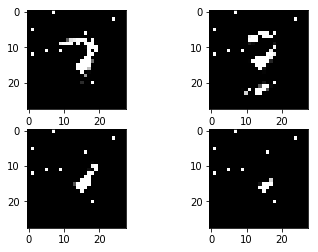

In [38]:
#Autoencoder
for epoch in range(31):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

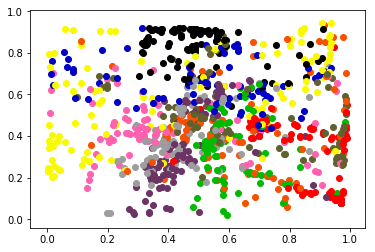

In [39]:
nums_scatter = sess.run(layer5.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.629028
epoch:  5  , loss:  0.628974
epoch:  10  , loss:  0.627578
epoch:  15  , loss:  0.627601
epoch:  20  , loss:  0.627619
epoch:  25  , loss:  0.6278
epoch:  30  , loss:  0.62751
epoch:  35  , loss:  0.627723
epoch:  40  , loss:  0.626359
epoch:  45  , loss:  0.625616
epoch:  50  , loss:  0.625054
epoch:  55  , loss:  0.625373
epoch:  60  , loss:  0.624128
epoch:  65  , loss:  0.623562
epoch:  70  , loss:  0.623518
epoch:  75  , loss:  0.623655
epoch:  80  , loss:  0.623237
epoch:  85  , loss:  0.623343
epoch:  90  , loss:  0.623584
epoch:  95  , loss:  0.62373
epoch:  100  , loss:  0.62371
[[  5.28158958e-14   2.35001285e-09   3.59885876e-15 ...,   6.24312060e-11
    1.51723889e-09   3.16568230e-11]
 [  2.07464171e-10   5.27986870e-17   5.09661913e-09 ...,   1.14611757e-13
    2.60732679e-13   9.17065555e-12]
 [  1.20980170e-11   7.49014462e-11   7.06326545e-13 ...,   4.80383566e-10
    2.69701501e-11   7.13149212e-13]
 [  1.36697565e-12   2.37349555e-13   1.

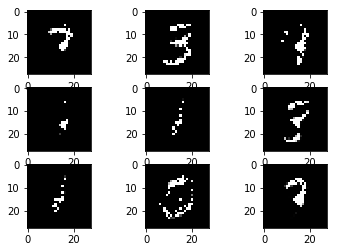

In [40]:
#Autoencoder
for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

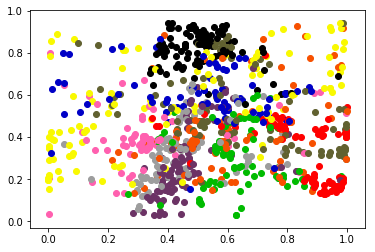

In [41]:
nums_scatter = sess.run(layer5.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.623669
epoch:  5  , loss:  0.623442
epoch:  10  , loss:  0.623778
epoch:  15  , loss:  0.623233
epoch:  20  , loss:  0.623319
epoch:  25  , loss:  0.623489
epoch:  30  , loss:  0.623485
epoch:  35  , loss:  0.623491
epoch:  40  , loss:  0.623231
epoch:  45  , loss:  0.623294
epoch:  50  , loss:  0.623355
epoch:  55  , loss:  0.623394
epoch:  60  , loss:  0.623384
epoch:  65  , loss:  0.623332
epoch:  70  , loss:  0.623369
epoch:  75  , loss:  0.623301
epoch:  80  , loss:  0.623564
epoch:  85  , loss:  0.623297
epoch:  90  , loss:  0.623248
epoch:  95  , loss:  0.623506
epoch:  100  , loss:  0.623153
epoch:  105  , loss:  0.623079
epoch:  110  , loss:  0.623287
epoch:  115  , loss:  0.623271
epoch:  120  , loss:  0.623486
epoch:  125  , loss:  0.623291
epoch:  130  , loss:  0.623243
epoch:  135  , loss:  0.623391
epoch:  140  , loss:  0.623233
epoch:  145  , loss:  0.62311
epoch:  150  , loss:  0.623114
epoch:  155  , loss:  0.623143
epoch:  160  , loss:  0.623279


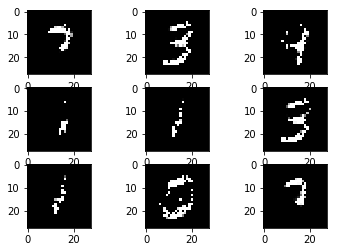

In [42]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

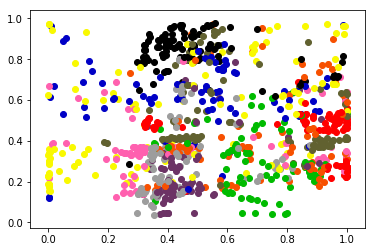

In [43]:
nums_scatter = sess.run(layer5.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.622976
epoch:  5  , loss:  0.62315
epoch:  10  , loss:  0.623008
epoch:  15  , loss:  0.623104
epoch:  20  , loss:  0.622887
epoch:  25  , loss:  0.622823
epoch:  30  , loss:  0.623032
epoch:  35  , loss:  0.622999
epoch:  40  , loss:  0.623071
epoch:  45  , loss:  0.623098
epoch:  50  , loss:  0.622814
epoch:  55  , loss:  0.6232
epoch:  60  , loss:  0.623033
epoch:  65  , loss:  0.623502
epoch:  70  , loss:  0.623169
epoch:  75  , loss:  0.623424
epoch:  80  , loss:  0.623256
epoch:  85  , loss:  0.622998
epoch:  90  , loss:  0.623285
epoch:  95  , loss:  0.62342
epoch:  100  , loss:  0.622992
epoch:  105  , loss:  0.623165
epoch:  110  , loss:  0.622975
epoch:  115  , loss:  0.623236
epoch:  120  , loss:  0.622801
epoch:  125  , loss:  0.623438
epoch:  130  , loss:  0.623206
epoch:  135  , loss:  0.623057
epoch:  140  , loss:  0.623309
epoch:  145  , loss:  0.62283
epoch:  150  , loss:  0.62323
epoch:  155  , loss:  0.622933
epoch:  160  , loss:  0.623854
epoch

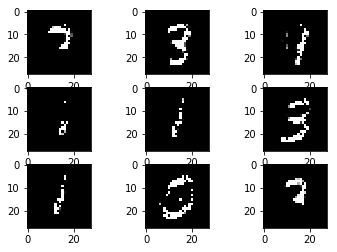

In [44]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

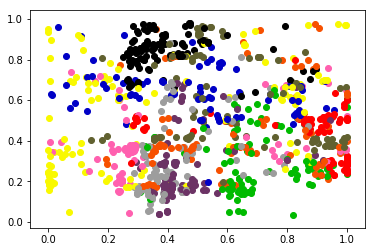

In [45]:
nums_scatter = sess.run(layer5.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.622888
epoch:  5  , loss:  0.622699
epoch:  10  , loss:  0.623155
epoch:  15  , loss:  0.623065
epoch:  20  , loss:  0.62295
epoch:  25  , loss:  0.623136
epoch:  30  , loss:  0.623626
epoch:  35  , loss:  0.623066
epoch:  40  , loss:  0.623241
epoch:  45  , loss:  0.622953
epoch:  50  , loss:  0.622932
epoch:  55  , loss:  0.623014
epoch:  60  , loss:  0.623023
epoch:  65  , loss:  0.623327
epoch:  70  , loss:  0.623309
epoch:  75  , loss:  0.623174
epoch:  80  , loss:  0.623037
epoch:  85  , loss:  0.623186
epoch:  90  , loss:  0.622902
epoch:  95  , loss:  0.622907
epoch:  100  , loss:  0.622974
epoch:  105  , loss:  0.623194
epoch:  110  , loss:  0.623126
epoch:  115  , loss:  0.623008
epoch:  120  , loss:  0.6229
epoch:  125  , loss:  0.623315
epoch:  130  , loss:  0.62277
epoch:  135  , loss:  0.622877
epoch:  140  , loss:  0.622985
epoch:  145  , loss:  0.623097
epoch:  150  , loss:  0.623415
epoch:  155  , loss:  0.623198
epoch:  160  , loss:  0.622858
epo

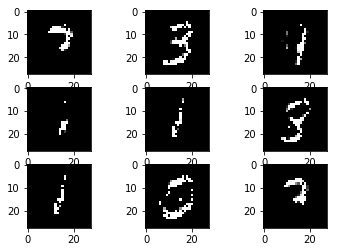

In [46]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

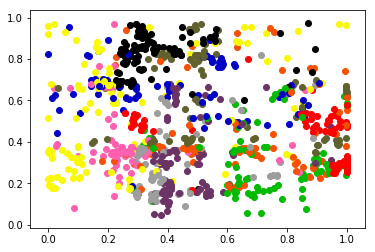

In [47]:
nums_scatter = sess.run(layer5.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.623134
epoch:  5  , loss:  0.623062
epoch:  10  , loss:  0.62291
epoch:  15  , loss:  0.622889
epoch:  20  , loss:  0.623314
epoch:  25  , loss:  0.623014
epoch:  30  , loss:  0.623274
epoch:  35  , loss:  0.623036
epoch:  40  , loss:  0.623345
epoch:  45  , loss:  0.622845
epoch:  50  , loss:  0.622968
epoch:  55  , loss:  0.623138
epoch:  60  , loss:  0.622978
epoch:  65  , loss:  0.623181
epoch:  70  , loss:  0.622733
epoch:  75  , loss:  0.623142
epoch:  80  , loss:  0.623026
epoch:  85  , loss:  0.622926
epoch:  90  , loss:  0.622908
epoch:  95  , loss:  0.622725
epoch:  100  , loss:  0.622801
epoch:  105  , loss:  0.623082
epoch:  110  , loss:  0.622833
epoch:  115  , loss:  0.623342
epoch:  120  , loss:  0.622701
epoch:  125  , loss:  0.622848
epoch:  130  , loss:  0.623082
epoch:  135  , loss:  0.623149
epoch:  140  , loss:  0.622893
epoch:  145  , loss:  0.623151
epoch:  150  , loss:  0.623224
epoch:  155  , loss:  0.622877
epoch:  160  , loss:  0.622925


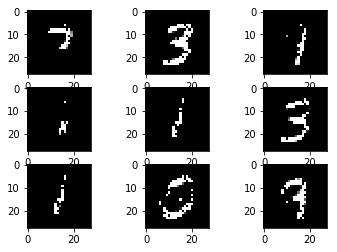

In [48]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer10.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer10_outputs])
print layer10_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

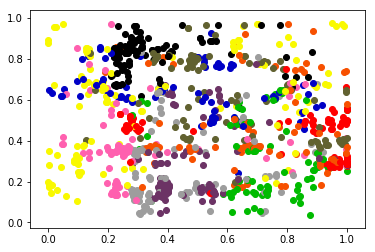

In [49]:
nums_scatter = sess.run(layer5.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)